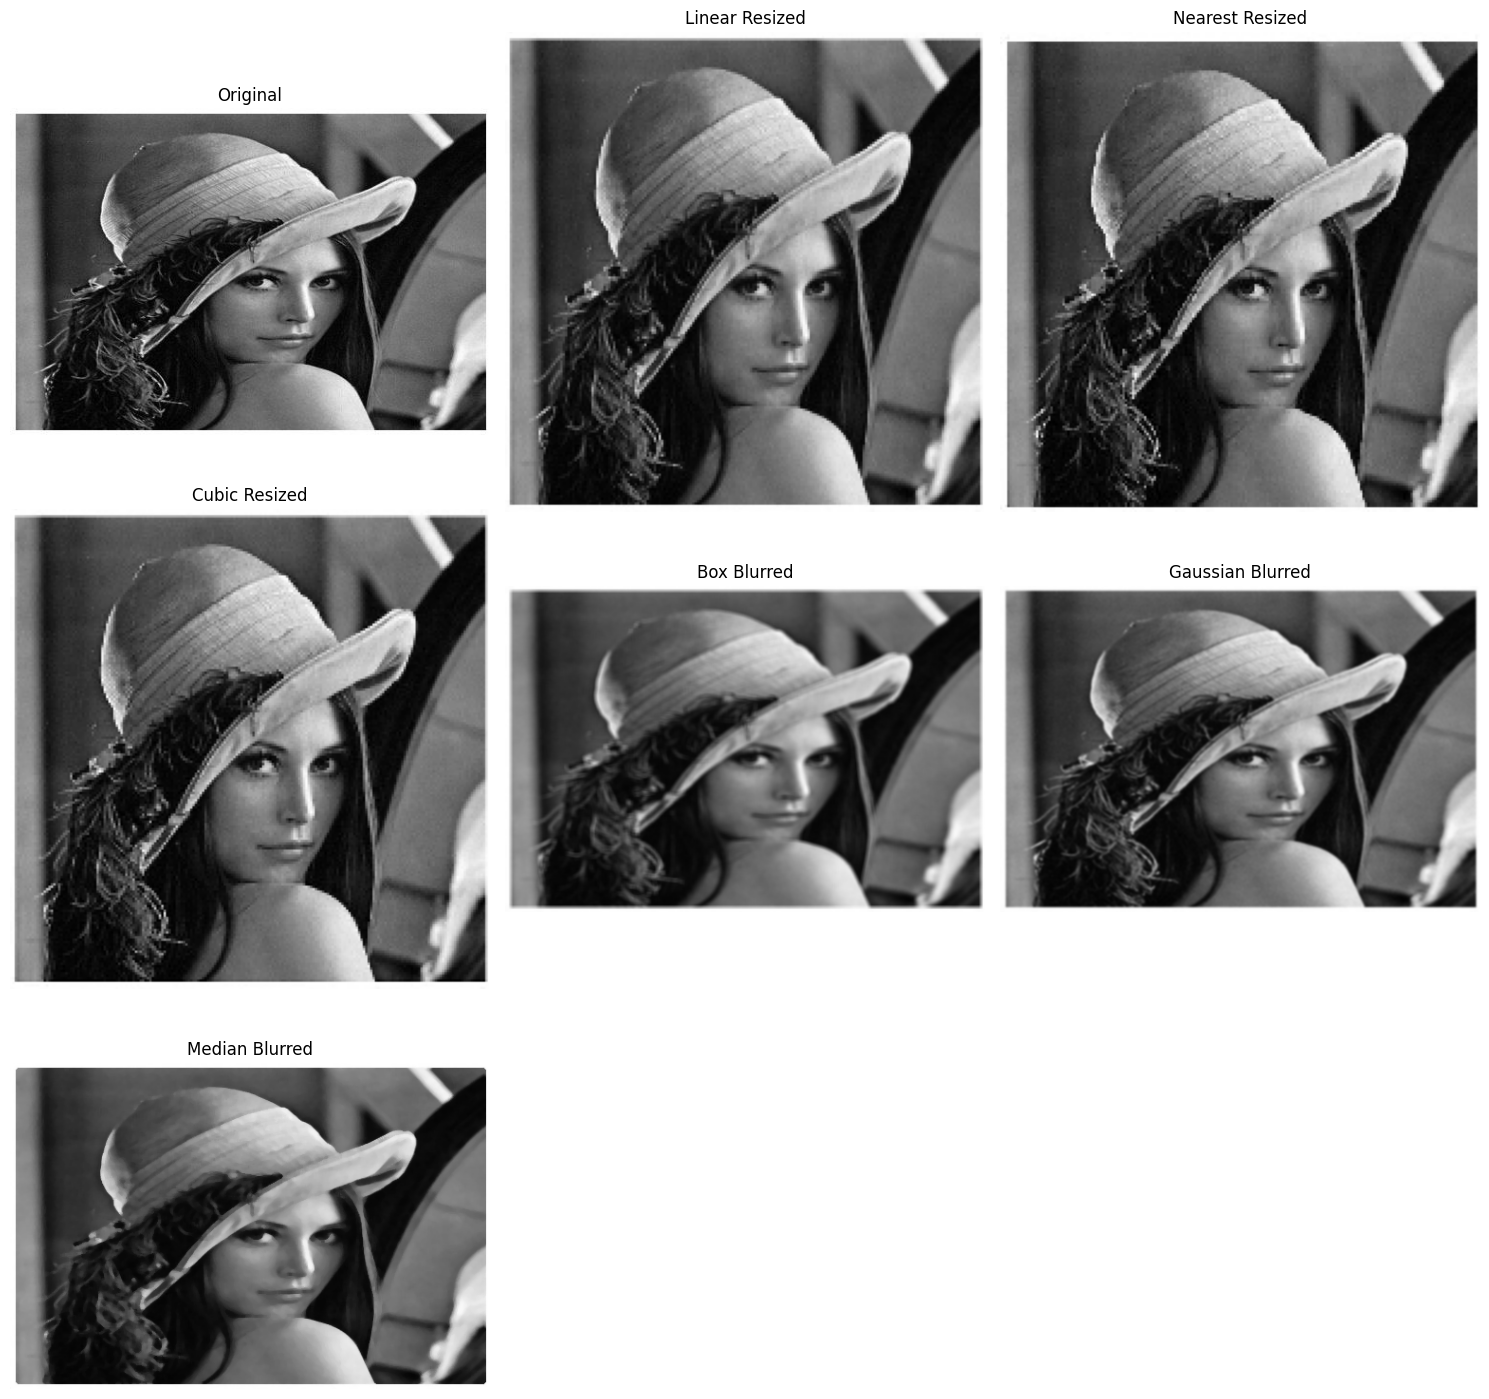

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/vision2.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_images(images, titles, cols=3):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

linear_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
cubic_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

box_blurred = cv2.blur(image, (5, 5))
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
median_blurred = cv2.medianBlur(image, 5)

show_images(
    [image, linear_resized, nearest_resized, cubic_resized,
     box_blurred, gaussian_blurred, median_blurred],
    ['Original', 'Linear Resized', 'Nearest Resized', 'Cubic Resized',
     'Box Blurred', 'Gaussian Blurred', 'Median Blurred']
)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Cross-Validation Mean Accuracy": np.mean(cv_scores)
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}\n")
        else:
            print(f"{metric}: {value}")
    print("-" * 50)


Model: Naive Bayes
Accuracy: 0.8472222222222222
Precision: 0.8649844547206135
Recall: 0.8476479221745045
F1 Score: 0.8437352605469787
Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]

Cross-Validation Mean Accuracy: 0.8391674404209223
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9722222222222222
Precision: 0.9740424119023985
Recall: 0.9727003722185199
F1 Score: 0.9732067700933176
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0 